In [1]:
import pickle
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from periodictable import elements

In [2]:
import exfor_tools

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [3]:
from query_elastic import print_failed_parses, query_elastic_data, reattempt_parse

In [4]:
import jitr

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target = (40, 20)

In [7]:
x = frozenset(["ERR-SYS"])
x

frozenset({'ERR-SYS'})

In [8]:
frozenset([frozenset([l]) for l in x])

frozenset({frozenset({'ERR-SYS'})})

In [9]:
(
    (entries_pp, failed_parses_pp),
    (entries_ppr, failed_parses_ppr),
    (entries_nn, failed_parses_nn),
) = query_elastic_data(target)


Parsing (p,p) ...
Found subentry C0076002 with the following columns:
['E-RSL', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry C0078002 with the following columns:
['EN-ERR', 'EN-RSL-FW', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Failed to parse subentry C0624002:
	Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
Found subentry C0893002 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry E0166012 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry E0249002 with the following columns:
['EN', 'POL-BM-MIN', 'POL-BM-MAX', 'E-RSL', 'ANG-ERR', 'ANG-CM', 'ANG-RSL', 'DATA-CM', 'DATA-ERR']
Found subentry E0795002 with the following columns:
['EN', 'ANG-CM', 'DATA']
Found subentry O0032002 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']
Found subentry O0049004 with th

# $(p,p)$

## Handle failed parses for $(p,p)$

In [10]:
print_failed_parses(failed_parses=failed_parses_pp)

Entry: C0624
C0624002  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
Entry: O0049
O0049004  :  Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
Entry: O0142
O0142004  :  Ambiguous statistical error labels:
ERR-1, ERR-T
Entry: O0208
O0208006  :  Ambiguous statistical error labels:
ERR-1, ERR-2
Entry: O0253
O0253002  :  Ambiguous statistical error labels:
ERR-1, ERR-2, ERR-3, ERR-DIG
Entry: O0382
O0382002  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T
Entry: T0101
T0101002  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR


In [11]:
entries_pp["C0624"] = reattempt_parse(
    failed_parses_pp["C0624"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


In [12]:
# per the paper:
# Thl statistical errors for the cross sections were 1 to 2 % for 6 < 25” and 3 to 6 %
# for 6 > 25”. The overall uncertainty in the absolute cross sections was estimated to
# be 5 %

entries_pp["O0049"] = reattempt_parse(
    failed_parses_pp["O0049"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049004 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [13]:
entries_pp["O0142"] = reattempt_parse(
    failed_parses_pp["O0142"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142004 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [14]:
# ERR-ANALYS (ERR-2) Relative error include all sources of error
#           except uncertainty in the target thickness.
# ERR-ANALYS (ERR-1) Uncertainty in the target thickness.
#
entries_pp["O0208"] = reattempt_parse(
    failed_parses_pp["O0208"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208006 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [15]:
entries_pp["O0253"] = reattempt_parse(
    failed_parses_pp["O0253"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253002 with the following columns:
['EN-ERR', 'ERR-1', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'EN', 'ANG-CM', 'DATA-CM']


In [16]:
# ERR-ANALYS (ERR-T).The Uncertainty is Shown on Figure by Authors.
#          (DATA-ERR).Data-Point Reader Uncertainty.
#
#
entries_pp["O0382"] = reattempt_parse(
    failed_parses_pp["O0382"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T", "DATA-ERR"],
    },
)

Found subentry O0382002 with the following columns:
['EN', 'EN-RSL-FW', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [17]:
entries_pp["T0101"] = reattempt_parse(
    failed_parses_pp["T0101"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101002 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA', 'DATA-ERR']


## Reject none-useful, discrepant our outlying experiments
 - O0253: In the 2023 release, the data sets for 16.57-20.58 were likely in the lab angle not cm angle frame. This appears to have been fixed in the 2024 release  (The offending subentries have been deleted or re-digitized)!

In [18]:
# Exclusions:
all_entries = entries_pp
del entries_pp["C0078"]  # redundant, huge uncertainties
del entries_pp["E0795"]  # duplicate, no uncertainties
del entries_pp["O0032"]  # duplicate to E0166 and E0249
del entries_pp["E0249"]  # duplicate to E0166 and O0032
del entries_pp["O0253"] # duplicate to Rutherford from same entry, some data shows Compound Elastic effects per original paper

# $(p,p)$ ratio

## handle failed parses for $(p,p)$ ratio

In [19]:
print_failed_parses(failed_parses=failed_parses_ppr)

Entry: E1677
E1677016  :  Ambiguous statistical error labels:
+DATA-ERR, -DATA-ERR
Entry: O0211
O0211004  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T
Entry: O0253
O0253017  :  Ambiguous statistical error labels:
ERR-1, ERR-2, ERR-3, ERR-DIG
Entry: O0302
O0302004  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2, ERR-DIG


In [20]:
entries_ppr["E1677"] = reattempt_parse(
    failed_parses_ppr["E1677"],
    parsing_kwargs={
        "statistical_err_labels": ["+DATA-ERR", "-DATA-ERR"],
        "statistical_err_treatment": "difference",
    },
)

Found subentry E1677016 with the following columns:
['EN', 'ANG-CM', 'DATA', '+DATA-ERR', '-DATA-ERR']


In [21]:
entries_ppr["O0211"] = reattempt_parse(
    failed_parses_ppr["O0211"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211004 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [22]:
entries_ppr["O0253"] = reattempt_parse(
    failed_parses_ppr["O0253"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253017 with the following columns:
['EN-ERR', 'ERR-1', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'EN', 'ANG-CM', 'DATA']


In [23]:
entries_ppr["O0302"] = reattempt_parse(
    failed_parses_ppr["O0302"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302004 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [24]:
del entries_ppr["E0120"] # no errors reported

## Reject non-useful, discrepant our outlying experiments

## handle failed parses for $(n,n)$

In [25]:
print_failed_parses(failed_parses=failed_parses_nn)

# Plotting

## Plot $(p,p)$

In [26]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_pp, min_num_pts=4
)

In [27]:
[[m.Einc for m in l] for l in measurements_categorized]

[[14.6],
 [16.0],
 [17.3],
 [17.8],
 [21.0],
 [23.5],
 [25.0],
 [26.3],
 [27.5],
 [30.0],
 [30.3],
 [35.0],
 [35.8],
 [40.0, 40.0],
 [45.0],
 [45.5],
 [48.0],
 [55.0],
 [61.4],
 [65.0],
 [75.0],
 [80.0],
 [135.0],
 [152.0],
 [156.0],
 [160.0],
 [181.5],
 [185.0]]

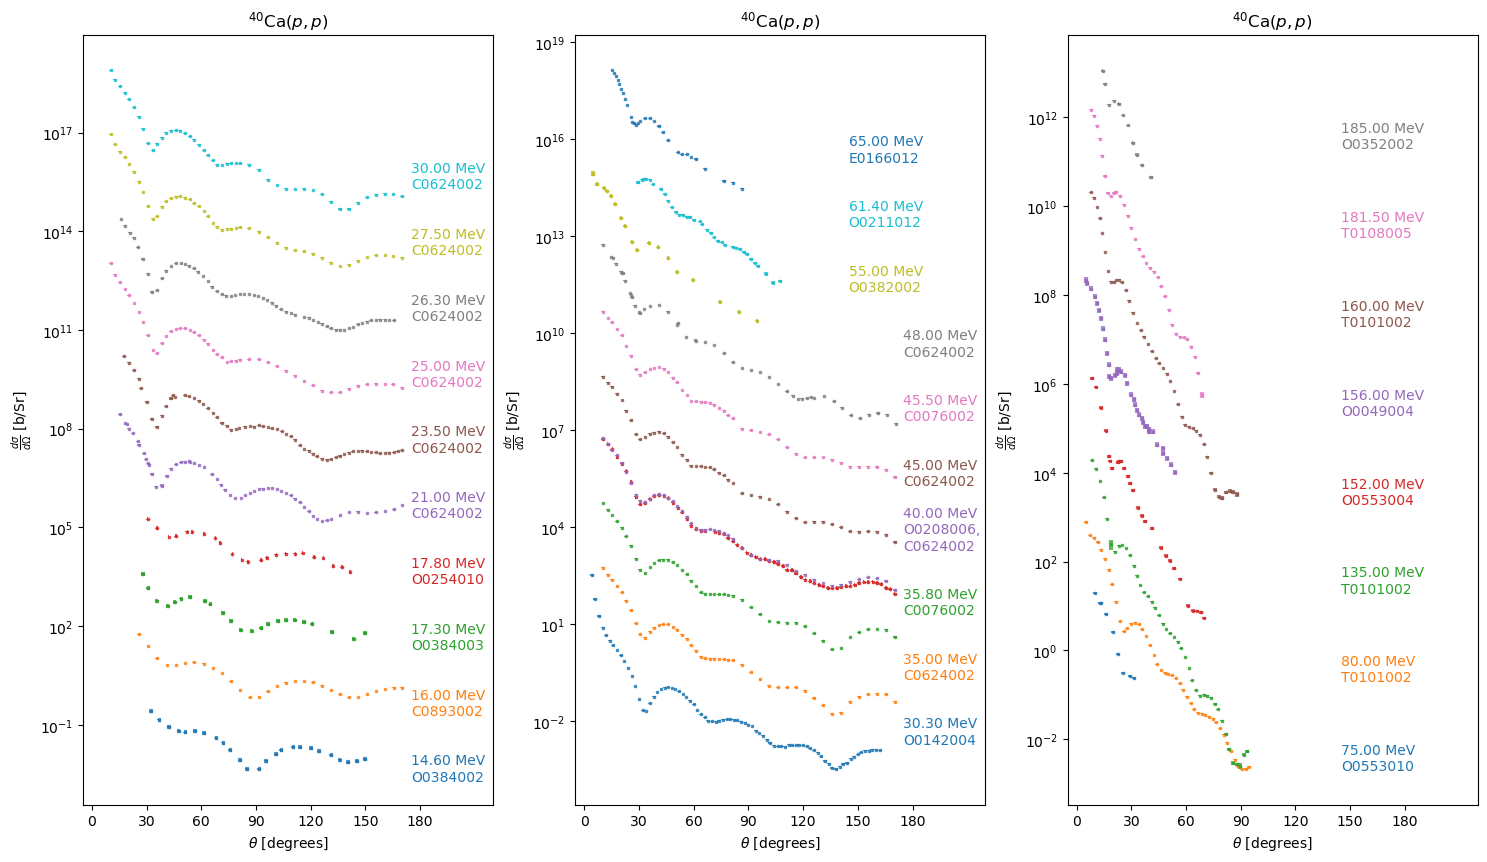

In [28]:
n_per_plot = 10
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_pp.values())[0].data_symbol,
        rxn_label=list(entries_pp.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
    axes[i].set_xlim([-5, 220])

## plot $(p,p)$ ratio

In [29]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_ppr, min_num_pts=4
)

In [30]:
[[(m.subentry, m.Einc) for m in l] for l in measurements_categorized]

[[('E1677016', 12.5)],
 [('O0239006', 14.08), ('O0253017', 13.98)],
 [('O0253017', 14.51), ('E1677016', 14.5)],
 [('E1677016', 15.4)],
 [('O0239004', 15.65), ('O0253017', 15.57)],
 [('O0253017', 15.97)],
 [('O0239002', 16.25)],
 [('O0253017', 16.57), ('E1677016', 16.5)],
 [('O0253017', 17.57)],
 [('E1677016', 18.5), ('O0253017', 18.57)],
 [('O0253017', 19.57)],
 [('E1677016', 20.5), ('O0253017', 20.57)],
 [('O0253017', 21.68)],
 [('O1199007', 35.0)],
 [('O0211004', 61.4)],
 [('O0302004', 160.0)]]

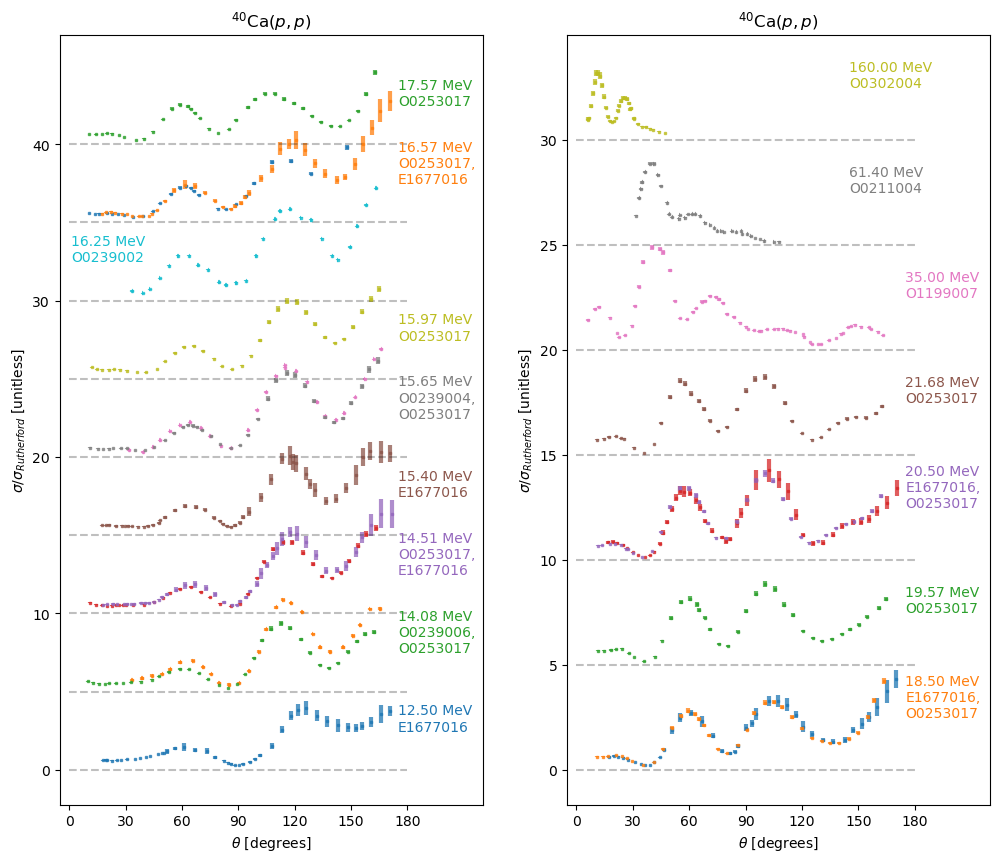

In [31]:
n_per_plot = 9
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N
    else:
        idxf = (i + 1) * n_per_plot
    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=5,
        data_symbol=list(entries_ppr.values())[0].data_symbol,
        rxn_label=list(entries_ppr.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 2.5,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        log=False,
        draw_baseline=True,
    )
    axes[i].set_xlim([-5, 220])

## Plot $(n,n)$

In [32]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_nn, min_num_pts=4
)

In [33]:
[[m.Einc for m in l] for l in measurements_categorized]

[[11.91, 11.9],
 [13.9, 13.905],
 [16.916, 16.9],
 [65.0],
 [75.0],
 [85.0],
 [95.0],
 [107.5],
 [127.5],
 [155.0],
 [185.0]]

(-20.0, 30.0)

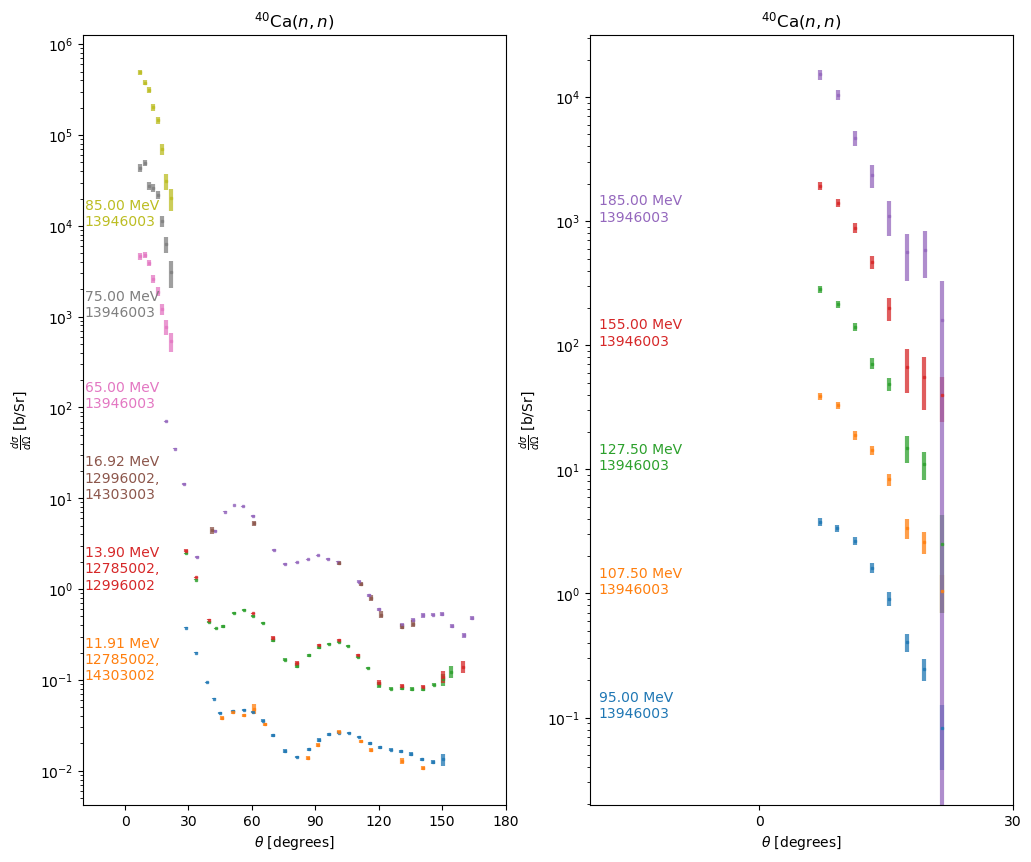

In [34]:
n_per_plot = 6
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=10,
        data_symbol=list(entries_nn.values())[0].data_symbol,
        rxn_label=list(entries_nn.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
axes[0].set_xlim([-20, 180])
axes[1].set_xlim([-20, 30])

# Write data to disk

In [35]:
A, Z = target
with open(f"{elements[Z]}{A}_diff_xs.pkl", "wb") as f:
    pickle.dump(
        {"n,n": entries_nn, "p,p": {"absolute": entries_pp, "ratio": entries_ppr}}, f
    )